In [1]:
from molmap import loadmap
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, log_loss
import warnings, os

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from copy import copy
from tqdm import tqdm


warnings.filterwarnings("ignore")

from matplotlib.ticker import FormatStrFormatter
#gfc = gfc.rename(columns = {'AUS':"AUS", 'CHI':'CHN', 'FRA':'FRA', 'GER':'DEU', 'USA':'USA'})

sns.set(style='white',  font='sans-serif', font_scale=2)  

In [2]:
gfc = pd.read_csv('./fig/00_gfc.csv', index_col=0)
adjp = pd.read_csv('./fig/01_adjp.csv', index_col=0)
coef = pd.read_csv('./fig/02_coef.csv', index_col=0)
gfi = pd.read_csv('./fig/03_gfi.csv', index_col=0)

In [3]:
# res = []
# for i in range(5):
#     for j in range(i):
#         x = gfc.columns[j] + ' vs. ' + gfc.columns[i]
#         res.append(x)

In [13]:
alls = []
for df, name in zip([gfi, gfc, adjp, coef], ['AggMapNet FI', 'Fold change', 'FDR adjusted p',  'LASSO coefficient',]):
    s1 = df.corr().unstack().reset_index()
    s1 = s1[s1.level_0 != s1.level_1]

    
    s1['Method'] = name
    
    s1['Cross'] = s1.level_0 + ' -> ' + s1.level_1
    s1["Pearson'r"] = s1[0]
    
    #s1 = s1[s1.Cross.isin(res)]
    
    s1 = s1.sort_values("Pearson'r", ascending=False)
        
    alls.append(s1[['Method', 'Cross', "Pearson'r"]])
    
dfp = pd.concat(alls)

In [89]:
color = sns.color_palette("rainbow_r",4) #PiYG

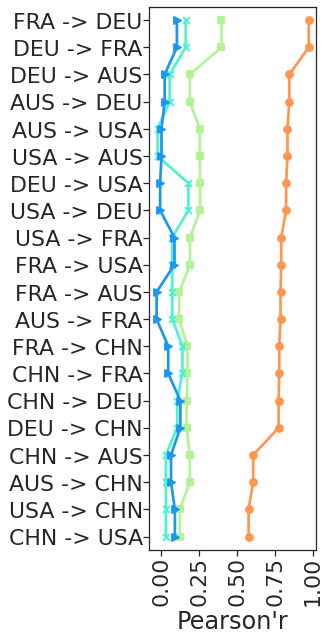

In [278]:
fig, ax  = plt.subplots(1, 1, figsize=(3, 10))
g = sns.pointplot(x="Pearson'r", y = "Cross", hue = 'Method', data=dfp, lw=2,
                s=100, alpha=1, markers=['o', 's', 'x', '>'], style='Method',
                  ax=ax,  palette=color, ) #legend=False,

ax.tick_params(axis='y', left='off', labelleft='on', pad=.3,)
ax.tick_params(axis='x', bottom='off', labelleft='on', pad=.3,)

#ax.locator_params(nbins=5)

g.legend_.remove()

ax.set_xticks([0, 0.25, 0.5, 0.75, 1])

ax.set_ylabel('')

plt.xticks(rotation=90)

plt.subplots_adjust(wspace = 0.18)

plt.savefig('./fig/4_corr.pdf', dpi = 400, bbox_inches="tight")

In [102]:
def get_cross_n(df, top = 50):
    ss = []
    for col in df.columns:
        s = df[col].sort_values(ascending=False)
        idx = s.head(top).index.to_list()
        s1 = set(idx)
        ss.append(s1)
    sn = ss[0] & ss[1] & ss[2] & ss[3] & ss[4]
    return len(sn)

In [266]:
res = []
for top in range(0, 99, 2):
    
    for df, name in zip([gfi, gfc, adjp, coef, ], ['AggMapNet FI', 'Fold change', 
                                                  'FDR adjusted p', 'LASSO coefficient', ]):
        res.append([name, top, get_cross_n(df, top)])


In [279]:
x = 'Top-K Microbes of each country'
y = 'Overlap Microbes \n among 5 countries'
dfp3 = pd.DataFrame(res, columns=['Method', x, y])

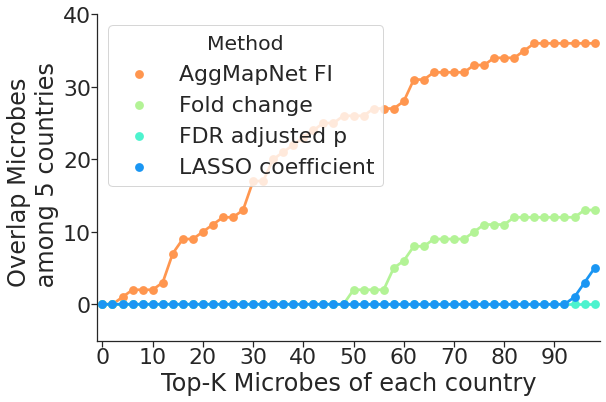

In [280]:
fig, ax  = plt.subplots(1, 1, figsize=(9, 6))

g = sns.pointplot(x=x, y = y, hue = 'Method', data=dfp3, palette=color, ax = ax, lw=4,)

ax.tick_params(axis='y', left='off', labelleft='on', pad=.3,)
ax.tick_params(axis='x', bottom='off', labelleft='on', pad=.3,)
ax.set_ylim(-5, 40)
#ax.set_xlim(0, 100)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.canvas.draw()
new_ticks = [i.get_text() for i in g.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 5), new_ticks[::5])

plt.subplots_adjust(wspace = 0.18)

plt.savefig('./fig/topk.pdf', dpi = 400, bbox_inches="tight")